In [4]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [5]:
@widgets.interact

def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [6]:
@widgets.interact(x=(0,5))
def f(x=3):
    print(x)

interactive(children=(IntSlider(value=3, description='x', max=5), Output()), _dom_classes=('widget-interact',)…

In [43]:
@widgets.interact_manual(
    color=['red', 'blue', 'green'], lw=(1., 10.))
def plot(freq=1, color='blue', lw=2, grid=True):
    t = np.linspace(-1, +1, 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t), 
            color=color, lw=lw)
    ax.grid(grid)

interactive(children=(IntSlider(value=1, description='freq', max=3, min=-1), Dropdown(description='color', ind…

In [18]:
freqSlider = widgets.FloatSlider(
    value = 3.0,
    min = 1.0,
    max = 10.0,
    step = 1,
    description = "Frequency:",
    readout_format = ".1f",
)
freqSlider

FloatSlider(value=3.0, description='Frequency:', max=10.0, min=1.0, readout_format='.1f', step=1.0)

In [20]:
rangeSlider = widgets.FloatRangeSlider(
    value = [-1., +1.],
    min = -5., 
    max  = +5., 
    step = 0.1,
    description = "xlim",
    readout_format = ".1f"
)
rangeSlider

FloatRangeSlider(value=(-1.0, 1.0), description='xlim', max=5.0, min=-5.0, readout_format='.1f')

In [22]:
gridButton = widgets.ToggleButton(
    value = True,
    description = "Grid",
    icon = "check"
)
gridButton

ToggleButton(value=True, description='Grid', icon='check')

In [23]:
colorOptions = widgets.ToggleButtons(
    options = ['Red', 'Green', 'Blue', 'Orange'],
    value = "Orange",
    description = "Color"
)
colorOptions

ToggleButtons(description='Color', index=3, options=('Red', 'Green', 'Blue', 'Orange'), value='Orange')

In [26]:
titleText = widgets.Text(
    value = "Lord of the Rings",
    description = "Title:"
)
titleText

Text(value='Lord of the Rings', description='Title:')

In [34]:
bgcolorPicker = widgets.ColorPicker(
    concise = True,
    description = "Background color:",
    value = "#efefef"
)
bgcolorPicker

ColorPicker(value='#efefef', concise=True, description='Background color:')

In [53]:
plotButton = widgets.Button(
    description = "Plot"
)
plotButton

Button(description='Plot', style=ButtonStyle())

In [45]:
def plotSine(b=None):
    freq = freqSlider.value
    xlim = rangeSlider.value
    grid = gridButton.value
    color = colorOptions.value
    title = titleText.value
    bgcolor = bgcolorPicker.value
    
    t = np.linspace(xlim[0], xlim[1], 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t), color=color)
    ax.grid(grid)

In [46]:
@plotButton.on_click
def plot_on_click(b):
    plotSine()

In [50]:
tab1 = VBox(children = [freqSlider, rangeSlider])
tab2 = VBox(children = [colorOptions, 
                       HBox(children = [titleText, bgcolorPicker]),
                       gridButton])

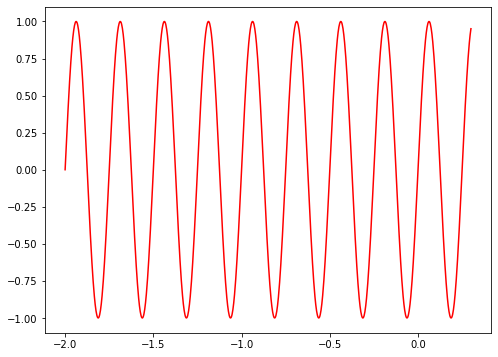

In [52]:
tab = widgets.Tab(children = [tab1, tab2])
tab.set_title(0, "Data")
tab.set_title(1, "Styling")
VBox(children= [tab, plotButton])
